In [1]:
import torch
import numpy as np
import cv2
from PIL import Image, ImageFilter
from glob import glob
import matplotlib.pyplot as plt

%matplotlib inline

## What are we going to cover today?

* Introduction to PyTorch
* Introduction to OpenCV
* Introduction to Pillow  

---

## Introduction to PyTorch

* What is PyTorch?
* How is it better than its competitors?
* What sets it apart?  

---

### Deep learning models are just Python programs
* Eager Execution
* Neural Network in PyTorch

```python
class LinearLayer(nn.Module):
  def __init__(self, in_sz, out_sz):
    super().__init__()
    t1 = torch.rand(in_sz, out_sz)
    self.w = nn.Parameter(t1)
    t2 = torch.randn(out_sz)
    self.b = nn.Parameter(t2)

  def forward(self, activations):
    t = torch.mm(activations, self.w)
    return t + self.b


class FullSimpleNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Conv2d(1,128,3)
    self.fc = LinearLayer(128,10)

  def forward(self, x):
    t1 = self.conv(x)
    t2 = nn.functional.relu(t1)
    t3 = self.fc(t2)
    return nn.functional.softmax(t3)
```


### Interoperability and extensibility  
PyTorch allows for bidirectional exchange of data with external libraries.  
For example, it provides a mechanism to convert between NumPy arrays and PyTorch tensors using the `torch.from_numpy()`
function and `.numpy()` tensor method.  
* `torch.utils.data.Dataset`
* DataLoader  

### Automatic differentiation (Autograd)
### An efficient C++ core  

Despite being closely integrated in the Python ecosystem, most of PyTorch is written in C++ to
achieve high performance. This core libtorch library implements the tensor data structure, the GPU
and CPU operators, and basic parallel primitives. It also provides the automatic differentiation system,
including the gradient formulas for most built-in functions
### Multiprocessing (Distributed PyTorch)
### Efficient Garbage Collection (Reference Counting)
### Memory Management, Caching
### Torchscript, Torchserve, etc

---  

## PyTorch  

### What is the difference between scalars, vectors, matrices and tensors?

![scalars, vectors, matrix, tensors](tensor.jpeg "Scalars vs Vectors vs Matrix vs Tensors")

### Numpy vs PyTorch  

* If you have worked on `numpy`, `pytorch` will look similar to you. Most of the functions are similar with very small to no difference between them.  
* From the implementation point of view, a very significant difference is that `numpy` works on `nd arrays` and `pytorch` works on `tensors`
* Numpy doesn't support operations on GPUs, whereas PyTorch does.

### Tensors/Arrays with Zeros, Ones and Random Numbers

In [2]:
print("Numpy\n")

zeros = np.zeros((3, 4))
print(zeros)
print(zeros.shape, "\n")

ones = np.ones((3, 4))
print(ones)
print(ones.shape, "\n")

random_nums = np.random.rand(3, 4)
print(random_nums)
print(random_nums.shape, "\n")

print(type(zeros), type(ones), type(random_nums))

Numpy

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
(3, 4) 

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
(3, 4) 

[[0.07859467 0.83727358 0.03495543 0.23567127]
 [0.29099072 0.62504095 0.74238769 0.97494238]
 [0.86252408 0.61724383 0.33935729 0.21456122]]
(3, 4) 

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
print("PyTorch\n")

zeros = torch.zeros((3, 4))
print(zeros)
print(zeros.shape, "\n")

ones = torch.ones((3, 4))
print(ones)
print(ones.shape, "\n")

random_nums = torch.rand((3, 4))
print(random_nums)
print(random_nums.shape, "\n")

print(type(zeros), type(ones), type(random_nums))

PyTorch

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.Size([3, 4]) 

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.Size([3, 4]) 

tensor([[0.0326, 0.0070, 0.1142, 0.0325],
        [0.0930, 0.9406, 0.1337, 0.5922],
        [0.0145, 0.7025, 0.6189, 0.3976]])
torch.Size([3, 4]) 

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


### Devices in PyTorch

In [4]:
torch.cuda.is_available()

True

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
!nvidia-smi

Wed Aug 11 08:44:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P5    14W /  N/A |    328MiB /  5946MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
x = torch.rand((20, 30)).to(device)
print(x.device)

x = torch.rand((20, 30)).cuda()
print(x.device)

cuda:0
cuda:0


/home/praneet/venv/pth_env/lib/python3.8/site-packages/torch/cuda/__init__.py:104: UserWarning: 
NVIDIA GeForce RTX 3060 Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA GeForce RTX 3060 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [8]:
!nvidia-smi

Wed Aug 11 08:44:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0    17W /  N/A |    435MiB /  5946MiB |     26%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
y = torch.rand((3, 4), dtype=torch.float16)
x.dtype, y.dtype

(torch.float32, torch.float16)

In [10]:
x = torch.rand((4, 4))
print(x)
print(x.shape, "\n")

x = x.reshape(1, -1)
print(x)
print(x.shape)

tensor([[6.9282e-01, 8.3110e-02, 2.2516e-01, 3.7787e-01],
        [8.7913e-01, 8.9538e-01, 8.2945e-01, 9.9583e-01],
        [9.1815e-04, 4.7946e-01, 3.3257e-02, 3.8597e-01],
        [8.7472e-01, 9.2826e-01, 7.3231e-01, 8.5335e-01]])
torch.Size([4, 4]) 

tensor([[6.9282e-01, 8.3110e-02, 2.2516e-01, 3.7787e-01, 8.7913e-01, 8.9538e-01,
         8.2945e-01, 9.9583e-01, 9.1815e-04, 4.7946e-01, 3.3257e-02, 3.8597e-01,
         8.7472e-01, 9.2826e-01, 7.3231e-01, 8.5335e-01]])
torch.Size([1, 16])


In [11]:
x = torch.rand((5, 5))
y = torch.tensor(3)
print(x.shape, y.shape, y, y.item())

torch.Size([5, 5]) torch.Size([]) tensor(3) 3


---  

## OpenCV & Pillow

### When and why to prefer PIL over OpenCV?

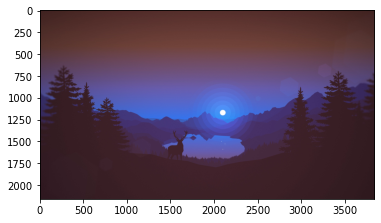

In [12]:
image = cv2.imread('637129.jpg')
plt.imshow(image)
plt.show()

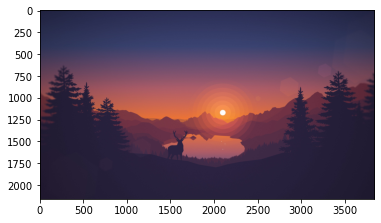

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

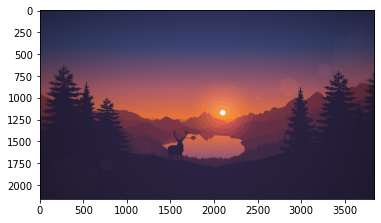

In [14]:
image = Image.open('637129.jpg')
plt.imshow(image)
plt.show()

### Resizing in OpenCV

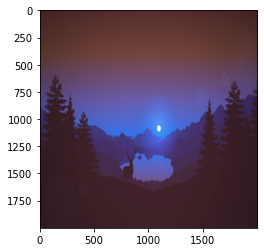

In [15]:
image = cv2.imread('637129.jpg')
image = cv2.resize(image, (2000, 2000))
plt.imshow(image)
plt.show()

### Cropping an image in OpenCV

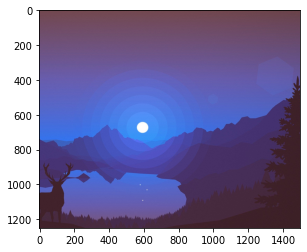

In [16]:
image = cv2.imread('637129.jpg')
x1, y1 = 1500, 500
x2, y2 = 3000, 1750
image = image[y1:y2, x1:x2]
plt.imshow(image)
plt.show()

### Image Loading speeds - OpenCV vs Pillow

In [17]:
image_paths = glob('/home/praneet/Projects/pytorch-tutorials/transfer_learning/data/hymenoptera_data/train/ants/*.jpg')[:100]
print(f"Number of images: {len(image_paths)}")

Number of images: 100


#### Loading images using OpenCV

In [18]:
%%timeit
for img_path in image_paths:
    image = cv2.imread(img_path)

317 ms ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Loading images in Pillow

In [19]:
%%timeit
for img_path in image_paths:
    image = Image.open(img_path)

5.86 ms ± 72.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Loading images in OpenCV and converting to RGB

In [20]:
%%timeit
for img_path in image_paths:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

336 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Image Processing operations in OpenCV

In [21]:
%%timeit
for img_path in image_paths:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))
    image = cv2.flip(image, 1)

336 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Image Processing operations in Pillow

In [22]:
%%timeit
for img_path in image_paths:
    image = Image.open(img_path)
    image = image.resize((32, 32))
    image = image.transpose(Image.FLIP_LEFT_RIGHT)

419 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---  

## References

* https://arxiv.org/pdf/1912.01703.pdf
* https://www.kaggle.com/vfdev5/pil-vs-opencv
* https://www.kaggle.com/yukia18/opencv-vs-pil-speed-comparisons-for-pytorch-user
* https://github.com/praneet9/Image_Processing_Scripts